# $n$-degree Bézier curve
Given a set $$\{P\} = \{P_0, \dots, P_n\}$$ of $n+1$ points $P \in \mathbb{R}^N$ and a  function $$f: [0, 1] \rightarrow \mathbb{R}$$ with 
$$f(0) = 0, \quad f(1) = 1,$$ the $n$-degree Bézier curve can be parametrized by

$$R_n(t) = \sum\limits_{k=0}^{n} {n\choose k}f^k(t)\sum\limits_{j=0}^{k}{k\choose j}(-1)^j P_{k-j}$$

In [315]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
import sys
print(sys.version)
plt.style.use("seaborn")

3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]


In [331]:
def bezier(t:float, targetDegree:int, *points):
    nPoints = len(points)
    if targetDegree >= nPoints or targetDegree<1:
        raise Exception(f"Not enough points provided. Expected at least {targetDegree+1}, got {nPoints}")
    
    dim = len(points[0])
    r = np.zeros_like((nPoints, dim))
    for k in range(n+1):
        innerSum = np.zeros_like(dim)
        for j in range(k+1):
            point = points[j]
            binCoeff = float(comb(k,j))
            innerSum = innerSum + binCoeff*(np.power(-1, j)) * points[k-j]
        r= r + float(comb(n,k)) * innerSum * np.power(t, k)
    return r

In [214]:
def generatePoints(tList, targetDegree, *points):
    resultList = []
    for t in tList:
        res = bezier(t, targetDegree, *points)
        resultList.append(res)
    return np.asarray(resultList)

In [363]:
t = np.linspace(0, 1, 100)

CPU times: total: 78.1 ms
Wall time: 116 ms


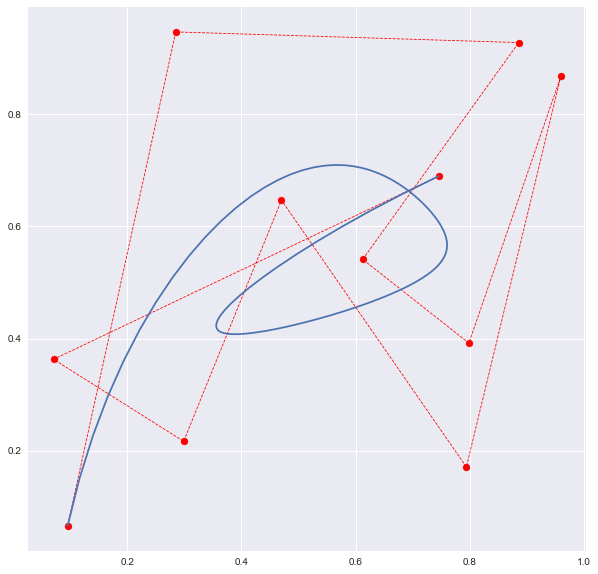

In [364]:
n = 10
points = np.random.random((n+1, 2))
# points=np.array([[0,0], [0,1],[1, 1], [1, 2]])
x, y = points.T

%time x1, y1 = generatePoints(t, n, *points).T
plt.figure(figsize=(10, 10))
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.scatter(x, y, c='r')
plt.plot(x, y, 'r--', lw=0.8, ms=5)
plt.plot(x1, y1)